In [ ]:
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.

Consider performing dimensionality reduction  beforehand to give your tree a better chance of finding features that are discriminative.and categorical encodeing must be done

In [ ]:
advantages 

In [ ]:
Simple to understand and to interpret. Trees can be visualised.
Requires little data preparation.(Note however that this module does not support missing values.)
The cost of using the tree is logarithmic in the number of data points used to train the tree.
Able to handle both numerical and categorical data.
Able to handle multi-output problems.
Uses a white box model
Possible to validate a model using statistical tests. 
Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

In [ ]:
 disadvantages

In [ ]:
Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting.
( pruning,setting the maximum depth of the tree are necessary to avoid this problem)

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated.
(This problem is mitigated by using decision trees within an ensemble.)

Predictions of decision trees are neither smooth nor continuous,it is useing piecewise constant approximations 

The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts.
(This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.)

Decision tree learners create biased trees if some classes dominate.
(recommended to balance the dataset prior to fitting with the decision tree)

# Classification

# Parameters

In [ ]:
criterion

In [ ]:
The function to measure the quality of a split.
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [ ]:
splitter

In [ ]:
The strategy used to choose the split at each node
Supported strategies are “best” to choose the best split and “random” to choose the best random split.

In [ ]:
max_depth

In [ ]:
The maximum depth of the tree. 
number of samples required to populate the tree becomme doubles for each additional level the tree grows to.
Use max_depth to control the size of the tree to prevent overfitting.

If None, then nodes are expanded until all leaves are pure or
until all leaves contain less than min_samples_split samples.

In [ ]:
min_samples_split

In [ ]:
The minimum number of samples required to split an internal node
it can support bothint and flot
A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. 

min_samples_split considers samples directly and independent of sample_weight, if provided 


In [ ]:
min_impurity_decrease

In [ ]:
starting criteria for A node to split.

In [ ]:
min_samples_leaf

The minimum number of samples required to be at a leaf node.
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
For classification with few classes, min_samples_leaf=1 (for bianary and n for maltinomial) is often the best choice.
For regression with few classes, min_samples_leaf=5 is often the best choice.

In [ ]:
max_leaf_nodes

In [ ]:
Grow a tree with max_leaf_nodes in best-first fashion.
If None then unlimited number of leaf nodes.

In [ ]:
min_impurity_split

Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
stoping criteria for a node

In [ ]:
min_weight_fraction_leaf

In [ ]:
the sum total of weights required to be at a leaf node

Samples have equal weight when sample_weight is not provided.


In [ ]:
min_weight_fraction_leaf or min_impurity_decrease if accounting for sample weights is required at splits.

In [ ]:
class_weight

In [ ]:
Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one.
For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

In [ ]:
ccp_alpha

In [ ]:
Complexity parameter used for Minimal Cost-Complexity Pruning. 
The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen


In [ ]:
random_state

In [ ]:
Controls the randomness of the estimator

In [ ]:
max_features

In [ ]:
The number of features to consider when looking for the best split:

In [ ]:
If int, then consider max_features features at each split.

If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

# load_breast_cancer

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from  sklearn.tree import plot_tree
import pandas as pd

In [2]:
da=load_breast_cancer()

In [3]:
X1=da.data
y1=da.target

In [4]:

scaled_X_1 = preprocessing.scale(X1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_X_1, y1)

In [5]:
DecisionTreeClassifier( criterion='gini', #The function to measure the quality of a split.(fixed)
                       splitter='best',#The strategy used to choose the split at each node.(fixed)
                       max_depth=None, #The maximum depth of the tree that expanded until all leaves contain less than (chosen)                                              min_samples_split samples.(fixed )
                       min_samples_split=2,#The minimum number of samples required to split an internal node (fixed)
                       min_samples_leaf=1, #The minimum number of samples required to be at a leaf node.(fixed)
                       min_weight_fraction_leaf=0.0,#Samples have equal weight when sample_weight is not provided.(fixed)
                       max_features=None, #The number of features to consider when looking for the best split(chosen.)
                       random_state=None, #Controls the randomness of the estimator. 
                       max_leaf_nodes=None, #Grow a tree with max_leaf_nodes in best-first fashion.(fixed)
                       min_impurity_decrease=0.0, #starting criteria for A node to split.(fiixed)
                       min_impurity_split=None, #Threshold for early stopping in tree growth. (fiixed)
                       class_weight=None, #Weights associated with classes 
                       ccp_alpha=0.0#Complexity parameter used for Minimal Cost-Complexity Pruning.(fiixed.)
                      )

DecisionTreeClassifier()

# approach1

most technical way 

In [6]:
DL_1=DecisionTreeClassifier(max_features=None) #If None, then max_features=n_features.
DL_2=DecisionTreeClassifier(max_features='auto') # then max_features=sqrt(n_features).
DL_3=DecisionTreeClassifier(max_features='sqrt') #then max_features=sqrt(n_features).
DL_4=DecisionTreeClassifier(max_features='log2') #then max_features=log2(n_features)

In [82]:
def parameter_model(parameter):
    DL_1=DecisionTreeClassifier(max_features=parameter)
    ccp_alphas=list(DL_1.cost_complexity_pruning_path(X_train1, y_train1, sample_weight=None).ccp_alphas)
    max_depth=[]
    for i in ccp_alphas:
        dl=DecisionTreeClassifier(ccp_alpha=i)
        tr=dl.fit(X_train1, y_train1)
        max_depth.append(tr.tree_.max_depth)
    parameters1={'max_depth':max_depth, ##Complexity parameter used for Minimal Cost-Complexity Pruning.
             'ccp_alpha':ccp_alphas##Complexity parameter used for Minimal Cost-Complexity Pruning.
            }
    clf_re_1 = GridSearchCV(DL_1,#estimator funtions 
                    parameters1,#define parameters
                    scoring='accuracy',#Strategy to evaluate the performance of the cross-validated model on the test set
                  )
    classic_model=clf_re_1.fit(X_train1, y_train1)
    tree_best_1=classic_model.best_estimator_.fit(X_train1, y_train1)
    y_pred=tree_best_1.predict(X_test1)
    ac_1=accuracy_score(y_test1,y_pred, normalize=True)
    
    model_detail= pd.DataFrame(
      {
        "best score": [classic_model.best_score_],
        "accuracy_score": [ac_1], 
        "depth":[classic_model.best_estimator_.max_depth],
        "ccp_alpha":[classic_model.best_estimator_.ccp_alpha],
        "max_features":[classic_model.best_estimator_.max_features]
      }
          )
    return   model_detail
        
    

In [87]:
p=parameter_model('log2')

In [88]:
p

,best score,accuracy_score,depth,ccp_alpha,max_features
0,0.946019,0.853147,6,0.009248,log2


In [67]:
p1=parameter_model(None)
p2=parameter_model('auto')
p3=parameter_model('sqrt')
p4=parameter_model('log2')

In [68]:
p1,p2,p3,p4

((0.9370629370629371,
  DecisionTreeClassifier(ccp_alpha=0.007511737089201878, max_depth=6),
  0.9506976744186048),
 (0.9370629370629371,
  DecisionTreeClassifier(ccp_alpha=0.007381185508774571, max_depth=5,
                         max_features='auto'),
  0.9437209302325582),
 (0.916083916083916,
  DecisionTreeClassifier(ccp_alpha=0.0077100534239922264, max_depth=4,
                         max_features='sqrt'),
  0.9554309165526675),
 (0.8881118881118881,
  DecisionTreeClassifier(ccp_alpha=0.005086071987480439, max_depth=3,
                         max_features='log2'),
  0.9506976744186046))

In [19]:
from sklearn.metrics import f1_score

# detail approach

In [7]:
DL_1=DecisionTreeClassifier(max_features=None) #If None, then max_features=n_features.
DL_2=DecisionTreeClassifier(max_features='auto') # then max_features=sqrt(n_features).
DL_3=DecisionTreeClassifier(max_features='sqrt') #then max_features=sqrt(n_features).
DL_4=DecisionTreeClassifier(max_features='log2') #then max_features=log2(n_features)

In [8]:
ccp_alphas_1=list(DL_1.cost_complexity_pruning_path(X_train1, y_train1, sample_weight=None).ccp_alphas)
ccp_alphas_2=list(DL_2.cost_complexity_pruning_path(X_train1, y_train1, sample_weight=None).ccp_alphas)
ccp_alphas_3=list(DL_3.cost_complexity_pruning_path(X_train1, y_train1, sample_weight=None).ccp_alphas)
ccp_alphas_4=list(DL_4.cost_complexity_pruning_path(X_train1, y_train1, sample_weight=None).ccp_alphas)

In [9]:
def max_depth(ccp_alphas):
    max_depth=[]
    for i in ccp_alphas:
        dl=DecisionTreeClassifier(ccp_alpha=i)
        tr=dl.fit(X_train1, y_train1)
        max_depth.append(tr.tree_.max_depth)
    return  max_depth

In [10]:
max_depth_1=max_depth(ccp_alphas_1)
max_depth_2=max_depth(ccp_alphas_2)
max_depth_3=max_depth(ccp_alphas_3)
max_depth_4=max_depth(ccp_alphas_4)

In [11]:
parameters1={'max_depth':max_depth_1, ##Complexity parameter used for Minimal Cost-Complexity Pruning.
             'ccp_alpha':ccp_alphas_1##Complexity parameter used for Minimal Cost-Complexity Pruning.
            }

parameters2={'max_depth':max_depth_2, ##Complexity parameter used for Minimal Cost-Complexity Pruning.
             'ccp_alpha':ccp_alphas_2##Complexity parameter used for Minimal Cost-Complexity Pruning.
            }

parameters3={'max_depth':max_depth_3, ##Complexity parameter used for Minimal Cost-Complexity Pruning.
             'ccp_alpha':ccp_alphas_3##Complexity parameter used for Minimal Cost-Complexity Pruning.
            }

parameters4={'max_depth':max_depth_4, ##Complexity parameter used for Minimal Cost-Complexity Pruning.
             'ccp_alpha':ccp_alphas_4##Complexity parameter used for Minimal Cost-Complexity Pruning.
            }

In [12]:
clf_re_1 = GridSearchCV(DL_1,#estimator funtions 
                    parameters1,#define parameters
                    scoring='accuracy',#Strategy to evaluate the performance of the cross-validated model on the test set
                    refit=True,#Refit an estimator using the best found parameters on the whole dataset.
                    n_jobs=None,#1 CPU core used when parallelizing over classes
                    cv=None,#None, to use the default 5-fold cross validation,
                    verbose=0,#not to show wearning massage
                    pre_dispatch='2*n_jobs',
                   return_train_score=False
                  )

clf_re_2 = GridSearchCV(DL_2,#estimator funtions 
                    parameters2,#define parameters
                    scoring='accuracy',#Strategy to evaluate the performance of the cross-validated model on the test set
                    refit=True,#Refit an estimator using the best found parameters on the whole dataset.
                    n_jobs=None,#1 CPU core used when parallelizing over classes
                    cv=None,#None, to use the default 5-fold cross validation,
                    verbose=0,#not to show wearning massage
                    pre_dispatch='2*n_jobs',
                   return_train_score=False
                  )


clf_re_3 = GridSearchCV(DL_3,#estimator funtions 
                    parameters3,#define parameters
                    scoring='accuracy',#Strategy to evaluate the performance of the cross-validated model on the test set
                    refit=True,#Refit an estimator using the best found parameters on the whole dataset.
                    n_jobs=None,#1 CPU core used when parallelizing over classes
                    cv=None,#None, to use the default 5-fold cross validation,
                    verbose=0,#not to show wearning massage
                    pre_dispatch='2*n_jobs',
                   return_train_score=False
                  )


clf_re_4 = GridSearchCV(DL_4,#estimator funtions 
                    parameters4,#define parameters
                    scoring='accuracy',#Strategy to evaluate the performance of the cross-validated model on the test set
                    refit=True,#Refit an estimator using the best found parameters on the whole dataset.
                    n_jobs=None,#1 CPU core used when parallelizing over classes
                    cv=None,#None, to use the default 5-fold cross validation,
                    verbose=0,#not to show wearning massage
                    pre_dispatch='2*n_jobs',
                   return_train_score=False
                  )

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
classic_model=clf_re_1.fit(X_train1, y_train1)
classic_model_1=clf_re_2.fit(X_train1, y_train1)
classic_model_2=clf_re_3.fit(X_train1, y_train1)
classic_model_3=clf_re_4.fit(X_train1, y_train1)

In [15]:
tree_best_1=classic_model.best_estimator_.fit(X_train1, y_train1)
tree_best_2=classic_model_1.best_estimator_.fit(X_train1, y_train1)
tree_best_3=classic_model_2.best_estimator_.fit(X_train1, y_train1)
tree_best_4=classic_model_3.best_estimator_.fit(X_train1, y_train1)


In [16]:
y_pred_1=tree_best_1.predict(X_test1)
y_pred_2=tree_best_2.predict(X_test1)
y_pred_3=tree_best_3.predict(X_test1)
y_pred_4=tree_best_4.predict(X_test1)

In [17]:
from sklearn.metrics import accuracy_score
ac_1=accuracy_score(y_test1,y_pred_1, normalize=True)
ac_2=accuracy_score(y_test1,y_pred_2, normalize=True)
ac_3=accuracy_score(y_test1,y_pred_3, normalize=True)
ac_4=accuracy_score(y_test1,y_pred_4, normalize=True)

In [20]:
model_detail= pd.DataFrame(
      {
        "model": ['classic_model','classic_model_1','classic_model_2','classic_model_3'],
        "best score": [classic_model.best_score_,classic_model_1.best_score_,classic_model_2.best_score_,classic_model_3.best_score_],
        "max_features": ['None','auto','sqrt','log2'],
        "f1_score":[f1_score(y_test1,y_pred_1, average='weighted'),f1_score(y_test1,y_pred_2, average='weighted'),f1_score(y_test1,y_pred_3, average='weighted'),f1_score(y_test1,y_pred_4, average='weighted')],
        "accuracy_score": [ac_1,ac_2,ac_3,ac_4], 
        "depth":[tree_best_1.tree_.max_depth,tree_best_2.tree_.max_depth,tree_best_3.tree_.max_depth,tree_best_4.tree_.max_depth]
      }
)

In [21]:
model_detail

,model,best score,max_features,f1_score,accuracy_score,depth
0,classic_model,0.953051,None,0.936452,0.937063,3
1,classic_model_1,0.945964,auto,0.937247,0.937063,4
2,classic_model_2,0.948345,sqrt,0.876585,0.874126,5
3,classic_model_3,0.938988,log2,0.896947,0.895105,5


In [236]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred_2)

array([[44,  7],
       [ 6, 86]], dtype=int64)

classic_model_1 is best model

# approach2

chose parameter randomely

In [45]:
parameters4={'max_features':['auto', 'sqrt', 'log2'],#The number of features to consider when looking for the best split
             'max_depth':[3,4,5,8], ##Complexity parameter used for Minimal Cost-Complexity Pruning.
             'ccp_alpha':[0,0.01,0.03,0.1]##Complexity parameter used for Minimal Cost-Complexity Pruning.
            }

In [46]:
clf_re = GridSearchCV(DL,#estimator funtions 
                    parameters4,#define parameters
                    scoring='accuracy',#Strategy to evaluate the performance of the cross-validated model on the test set
                    refit=True,#Refit an estimator using the best found parameters on the whole dataset.
                    n_jobs=None,#1 CPU core used when parallelizing over classes
                    cv=None,#None, to use the default 5-fold cross validation,
                    verbose=0,#not to show wearning massage
                    pre_dispatch='2*n_jobs',
                   return_train_score=False
                  )

In [47]:
model2=clf_re.fit(X_train1, y_train1)

In [48]:
model2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=8, max_features='auto')

In [49]:
model2.best_score_

0.9389876880984952

In [50]:
model=DecisionTreeClassifier(ccp_alpha=0, max_depth=5, max_features='sqrt')

In [51]:
tree=model.fit(X_train1, y_train1)

[Text(186.7153846153846, 195.696, 'X[22] <= 0.006\ngini = 0.459\nsamples = 426\nvalue = [152, 274]'),
 Text(103.01538461538462, 152.208, 'X[27] <= 0.311\ngini = 0.092\nsamples = 269\nvalue = [13, 256]'),
 Text(51.50769230769231, 108.72, 'X[0] <= 0.242\ngini = 0.032\nsamples = 248\nvalue = [4, 244]'),
 Text(25.753846153846155, 65.232, 'X[23] <= -0.167\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(12.876923076923077, 21.744, '\n  (...)  \n'),
 Text(38.63076923076923, 21.744, '\n  (...)  \n'),
 Text(77.26153846153846, 65.232, 'X[8] <= -0.616\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(64.38461538461539, 21.744, '\n  (...)  \n'),
 Text(90.13846153846154, 21.744, '\n  (...)  \n'),
 Text(154.52307692307693, 108.72, 'X[22] <= -0.155\ngini = 0.49\nsamples = 21\nvalue = [9, 12]'),
 Text(128.76923076923077, 65.232, 'X[7] <= 0.187\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(115.8923076923077, 21.744, '\n  (...)  \n'),
 Text(141.64615384615385, 21.744, '\n  (...)  \n'),
 Te

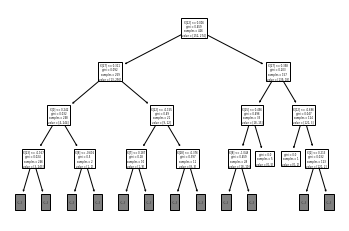

In [52]:
plot_tree(tree, max_depth=3)

In [53]:
y_pred_1=model2.predict(X_test1)

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test1,y_pred_1, average='macro')

0.9200101703534198

model cointain low varience and  low bais so it is good 

# DecisionTreeRegressor

In [ ]:
all parameter are same as in classification ,class  weight is ot consider hear.

In [ ]:
DecisionTreeRegressor(criterion='mse',#The function to measure the quality of a split.(fixed)
                                         splitter='best', #The strategy used to choose the split at each node.(fixed)
                                         max_depth=None, #The maximum depth of the tree that expanded until all leaves contain less than (chosen)
                                         min_samples_split=2, #The minimum number of samples required to split an internal node (fixed)
                                         min_samples_leaf=5, #The minimum number of samples required to be at a leaf node.(fixed)
                                         min_weight_fraction_leaf=0.0, #Samples have equal weight when sample_weight is not provided.(fixed)
                                         max_features=None, #The number of features to consider when looking for the best split(chosen.)
                                         random_state=None, #Controls the randomness of the estimator. 
                                         max_leaf_nodes=None, #Grow a tree with max_leaf_nodes in best-first fashion.(fixed)
                                         min_impurity_decrease=0.0, #starting criteria for A node to split.(fiixed)
                                         min_impurity_split=None,#Threshold for early stopping in tree growth. (fiixed)
                                         ccp_alpha=0.0#Complexity parameter used for Minimal Cost-Complexity Pruning.(fiixed.)
                                        )

In [56]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from  sklearn.tree import plot_tree
import pandas as pd

In [57]:
da1= load_boston()
X=da1.data
y=da1.target
scaled_X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y)

In [58]:
parameters5={'max_features':['auto', 'sqrt', 'log2'],#The number of features to consider when looking for the best split
             'max_depth':[3,4,5,8], ##Complexity parameter used for Minimal Cost-Complexity Pruning.
            }

In [59]:
DL1=DecisionTreeRegressor(min_samples_leaf=5)

In [60]:
clf_re_1 = GridSearchCV(DL1,#estimator funtions 
                    parameters5,#define parameters
                    scoring='r2',#Strategy to evaluate the performance of the cross-validated model on the test set
                    refit=True,#Refit an estimator using the best found parameters on the whole dataset.
                    n_jobs=None,#1 CPU core used when parallelizing over classes
                    cv=None,#None, to use the default 5-fold cross validation,
                    verbose=0,#not to show wearning massage
                    pre_dispatch='2*n_jobs',
                   return_train_score=False
                  )

In [61]:
model4=clf_re_1.fit(X_train, y_train)

In [62]:
model4.best_estimator_

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=5)

In [63]:
model4.best_score_

0.7804838581897828

In [67]:
mode_4=DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=5)

In [68]:
tree=mode_4.fit(X_train, y_train)

[Text(152.96896551724137, 195.696, 'X[12] <= -0.41\nmse = 83.009\nsamples = 379\nvalue = 22.483'),
 Text(63.49655172413793, 152.208, 'X[5] <= 1.036\nmse = 75.806\nsamples = 162\nvalue = 29.537'),
 Text(23.089655172413792, 108.72, 'X[7] <= -1.003\nmse = 39.425\nsamples = 121\nvalue = 26.139'),
 Text(11.544827586206896, 65.232, 'mse = 81.0\nsamples = 5\nvalue = 45.5'),
 Text(34.63448275862069, 65.232, 'X[5] <= 0.367\nmse = 20.779\nsamples = 116\nvalue = 25.304'),
 Text(23.089655172413792, 21.744, '\n  (...)  \n'),
 Text(46.179310344827584, 21.744, '\n  (...)  \n'),
 Text(103.90344827586206, 108.72, 'X[5] <= 1.639\nmse = 48.517\nsamples = 41\nvalue = 39.566'),
 Text(80.81379310344828, 65.232, 'X[6] <= 0.351\nmse = 21.051\nsamples = 21\nvalue = 34.443'),
 Text(69.26896551724138, 21.744, '\n  (...)  \n'),
 Text(92.35862068965517, 21.744, '\n  (...)  \n'),
 Text(126.99310344827586, 65.232, 'X[10] <= -1.413\nmse = 20.863\nsamples = 20\nvalue = 44.945'),
 Text(115.44827586206895, 21.744, '\n  

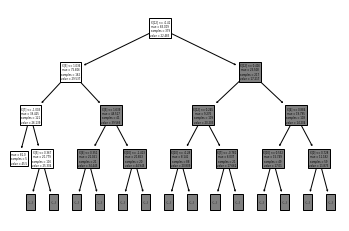

In [69]:
plot_tree(tree, max_depth=3)

In [70]:
mode_4.predict(X_test)

array([26.6125    , 17.61666667, 17.47142857, 11.36      , 31.66      ,
       18.88      , 15.54285714, 21.58      , 21.8       , 14.07777778,
       17.47142857, 14.07777778, 36.15      , 40.06      , 14.07777778,
       11.33333333, 10.3125    , 20.99      , 30.68333333, 13.55      ,
       10.3125    , 15.14      , 20.99      , 50.        , 19.58333333,
       21.74      , 15.14      , 10.3125    , 17.7375    , 24.04      ,
       19.26666667, 35.94      , 21.8       , 14.07777778, 43.28      ,
       10.3125    , 26.6125    , 28.575     , 19.97142857, 40.06      ,
       17.47142857, 50.        , 19.55      , 23.4       , 26.34      ,
       21.76666667, 28.575     , 15.54285714, 11.36      , 46.44      ,
       14.07777778, 24.04      , 23.4       , 33.5       , 31.66      ,
       18.88      , 50.        , 19.55      , 22.45      , 46.44      ,
       17.7375    , 19.58333333, 18.06      , 21.6375    , 21.74      ,
       46.44      , 18.06      , 10.3125    , 36.15      , 33.5 

In [71]:
mode_4.score( X_test, y_test) #return  r2

0.8190557540776626

model cointain low varience and  low bais so it is good 